In [105]:
import numpy as np
from math import pi as PI
from sklearn.preprocessing import PolynomialFeatures 
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [106]:
x = np.arange(-10 , 10 , 0.2)
y = 2 * np.cos(x)/-PI + 2 * np.sin(2 * x)/(2 * PI) + 2 * np.cos(3 * x)/(-3 * PI)

In [107]:
## gaussian niose
np.random.seed(50)
noise = np.random.normal(0,1,100)
yhat = y + noise * 0.12
mse1 =[]
bias1 =[]
var1 =[]
for i in range(1,16):
    poly = PolynomialFeatures(degree=i ,include_bias = False)
    Xpoly = poly.fit_transform(x.reshape(-1,1))
    LR = LinearRegression()
    LR.fit(Xpoly, yhat)
    X_new_poly = poly.transform(x.reshape(-1,1))
    y_predict  = LR.predict(X_new_poly)
    
    m, b, v = bias_variance_decomp(LR, Xpoly, yhat.ravel(), Xpoly, yhat.ravel(),
                                         loss='mse', num_rounds=200, random_seed=1)
    mse1.append(m)
    bias1.append(b)
    var1.append(v)
    
print('best ploynomial degree is =',mse1.index(min(mse1))+1)
print('worst ploynomial degree is =',mse1.index(max(mse1))+1) 
print('\n')
print('mse results =',mse1)
print('\n')
print('bias results =',bias1)
print('\n')
print('variance results =',var1)

best ploynomial degree is = 10
worst ploynomial degree is = 15


mse results = [0.30228580665916466, 0.2946108762657045, 0.29807115305081516, 0.25900312651657187, 0.2584664328714465, 0.26078765093847595, 0.2795406349510266, 0.1312605161473863, 0.1610436331539696, 0.10741920687872698, 0.13655015347945143, 0.15071853513996258, 0.32994916511587824, 0.9578828772246999, 1.1137552882001354]


bias results = [0.29663652190644596, 0.28619695752816765, 0.2862312326659709, 0.24681296685956336, 0.24405696172065222, 0.2309902039766266, 0.226482355395183, 0.10970366895721614, 0.11030864631309187, 0.07760252312284477, 0.08089869115461515, 0.07751586432200087, 0.07543061383995586, 0.09126063052943069, 0.10555471284308034]


variance results = [0.005649284752718718, 0.008413918737536778, 0.011839920384844315, 0.012190159657008483, 0.014409471150794226, 0.029797446961849328, 0.05305827955584351, 0.021556847190170134, 0.050734986840877704, 0.029816683755882173, 0.0556514623248363, 0.0732026708179617, 0.

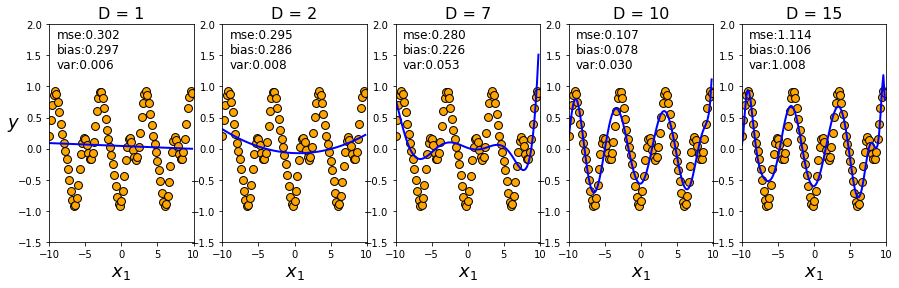

In [108]:
fig, axs = plt.subplots(1, 5, figsize=(15, 4))

for i, deg in enumerate([1, 2, 7, 10, 15]):
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly_features.fit_transform(x.reshape(-1,1))
    lin_reg = LinearRegression()
    mse, bias, var = bias_variance_decomp(lin_reg, X_poly, yhat.ravel(), X_poly, yhat.ravel(),
                                         loss='mse', num_rounds=200, random_seed=1)
    lin_reg.fit(X_poly, yhat)
    
    X_new = x.reshape(-1, 1)
    X_new_poly = poly_features.transform(X_new)
    y_predict = lin_reg.predict(X_new_poly)
    
    axs[i].scatter(x, y, color='orange', s=250, marker='.', edgecolor='black')
    axs[i].plot(X_new_poly[:, 0],y_predict,"b",linewidth=2,label="Predictions")
    axs[i].set_xlabel("$x_1$", fontsize=18)
    axs[i].set_title(r"D = {}".format(deg), fontsize=16)
    axs[i].axis([-10, 10, -1.5, 2])
    axs[i].text(-9,1.3,f"mse:{mse:.3f}\nbias:{bias:.3f}\nvar:{var:.3f}",size=12)
axs[0].set_ylabel("$y$", rotation=0, fontsize=18);

In [109]:
## poisson niose
noise = np.random.poisson(2,100)
yhat2 = y + noise * 0.12

mse2 =[]
bias2 =[]
var2 =[]

for i in range(1,16):
    poly = PolynomialFeatures(degree=i ,include_bias = False)
    Xpoly = poly.fit_transform(x.reshape(-1,1))
    LR = LinearRegression()
    LR.fit(Xpoly, yhat2)
    m, b, v = bias_variance_decomp(LR, Xpoly, yhat2.ravel(), Xpoly, yhat2.ravel(),
                                         loss='mse', num_rounds=200, random_seed=1)
    mse2.append(m)
    bias2.append(b)
    var2.append(v)

print('best ploynomial degree is =',mse2.index(min(mse2))+1)
print('worst ploynomial degree is =',mse2.index(max(mse2))+1) 
print('\n')
print('mse results =',mse2)
print('\n')
print('bias results =',bias2)
print('\n')
print('variance results =',var2)

best ploynomial degree is = 10
worst ploynomial degree is = 15


mse results = [0.29171206532301774, 0.280451268951391, 0.28349474679664266, 0.24287092372784008, 0.24205690711514896, 0.25045552006019045, 0.26849136238689214, 0.13376926691872965, 0.16964782681957563, 0.09599167803658426, 0.11379155716057818, 0.21223674289510988, 0.21178429246196678, 0.7392580462688509, 2.726931560662304]


bias results = [0.28619426305572954, 0.27283494282904486, 0.2728251949568671, 0.2313930870142087, 0.22878258514116115, 0.22292912991285505, 0.2179958087918661, 0.10986649885405717, 0.112613984928683, 0.07381231522840646, 0.0760279893697649, 0.08194800367003334, 0.06833838923485835, 0.07954445237977086, 0.13115582998603154]


variance results = [0.005517802267288182, 0.007616326122346185, 0.010669551839775629, 0.011477836713631421, 0.013274321973987773, 0.02752639014733545, 0.05049555359502604, 0.023902768064672442, 0.05703384189089261, 0.02217936280817779, 0.03776356779081328, 0.1302887392250766, 0.14

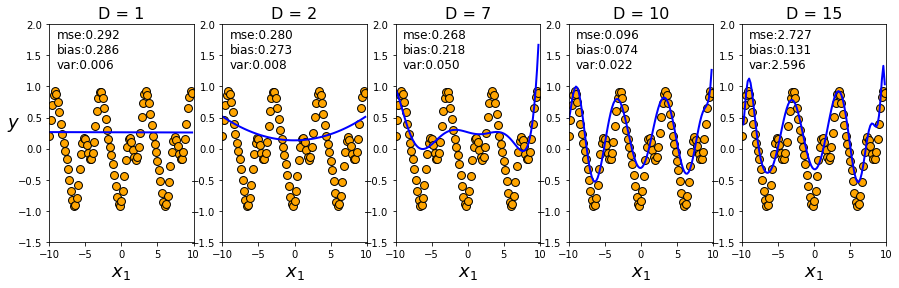

In [110]:
fig, axs = plt.subplots(1, 5, figsize=(15, 4))

for i, deg in enumerate([1, 2, 7, 10, 15]):
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly_features.fit_transform(x.reshape(-1,1))
    lin_reg = LinearRegression()
    mse, bias, var = bias_variance_decomp(lin_reg, X_poly, yhat2.ravel(), X_poly, yhat2.ravel(),
                                         loss='mse', num_rounds=200, random_seed=1)
    lin_reg.fit(X_poly, yhat2)
    
    X_new = x.reshape(-1, 1)
    X_new_poly = poly_features.transform(X_new)
    y_predict = lin_reg.predict(X_new_poly)
    
    axs[i].scatter(x, y, color='orange', s=250, marker='.', edgecolor='black')
    axs[i].plot(X_new_poly[:, 0],y_predict,"b",linewidth=2,label="Predictions")
    axs[i].set_xlabel("$x_1$", fontsize=18)
    axs[i].set_title(r"D = {}".format(deg), fontsize=16)
    axs[i].axis([-10, 10, -1.5, 2])
    axs[i].text(-9,1.3,f"mse:{mse:.3f}\nbias:{bias:.3f}\nvar:{var:.3f}",size=12)
axs[0].set_ylabel("$y$", rotation=0, fontsize=18);